In [1]:
# imports
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import random
from numpy import linalg as LA
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean


Populating the interactive namespace from numpy and matplotlib


In [2]:
def dist(img1, img2):
    res = numpy.linalg.norm(img1 - img2, ord = 1)
    return res

In [3]:
#initialization
def load_pic():
    class_count = 40
    image_count = 10
    imgs = []
    for i in range(class_count):
        imgs.append([])
        for j in range(image_count):
            address = "data/s" + str(i+1) + "/" + str(j+1) + ".pgm"
            imgs[i].append(mpimg.imread(address))
    return imgs

In [4]:
#set test, train

def test_train(imgs, count):
    train = []
    test = []
    for i in imgs:
        train.append(i[:count])
        test.append(i[count:])
    return test, train

In [5]:
def scale(img, mult):
    res = []
    h = len(img)
    w = len(img[0])
    h_count = int(h/mult)
    w_count = int(w/mult)
    for i in range(h_count):
        for j in range (int(w_count)):
            res.append(0)
            value = 0
            for q in range(mult):
                for p in range(mult):
                    value += img[i*mult+q][j*mult+p];
            value = value / mult*mult;
            res.append(value)
    
    for i in range(w_count*h_count):
        res[i] = res[i]/mult/mult
        
    return res

In [6]:
def scale(img, mult):
#     res = resize(img, (w_count, h_count)).flatten().astype(int)
    
    res = rescale(img, 1 / mult, anti_aliasing=False).flatten() * 200
        
    return res.astype(int)

def scaleXY(img, size_X, size_Y):
    res = resize(img, (size_X, size_Y)).flatten().astype(int)
        
    return res

In [7]:
def random_list(count,img):
    h = len(img)
    w = len(img[0])
    res = []
    for i in range(count):
        r = int(random.random()*(h*w-1))
        elem = []
        elem.append(int(r/w))
        elem.append(r%w)
        res.append(elem)
    return np.array(res)

In [8]:
def random_img(img, rand_list):
    res = []
    for i in rand_list:
        res.append(img[i[0]][i[1]])
    return np.array(res)

In [9]:
def fft(img, size):
    res = []
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    for i in range(int(len(fshift)/2-size[0]), int(len(fshift)/2+size[0])):
        for j in range(int(len(fshift[0])/2-size[1]), int(len(fshift[0])/2+size[1])):
            res.append(fshift[i][j])
    return res;

In [10]:
def dist_complex(img1, img2):
    res = 0
    for i in range(len(img1)):
        res += abs(img1[i] - img2[i])
    return res;

In [11]:
# def dct():
#     
def dct2(img2, size):
    img = np.array(img2)
    m = dct(dct(img.T, norm='ortho').T, norm='ortho')
    res = []
    for i in range(size[0]):
        for j in range(size[1]):
            res.append(m[i][j])
    return res 

In [12]:
def hist(img, count):
    res = []
    for i in range(count):
        res.append(0)
    for i in img:
        for j in i:
            res[int((j/255)*count)] += 1
    return res;

In [13]:
def grad(img, W, S):
    res = []
    for i in range(S,int((len(img)-W)/S)):
        value = 0
        for j in range(W*len(img[0])):
            id_h = int(i*S+j/(len(img[0])))
            id_w = int(j%(len(img[0])))
            value += abs(img[id_h][id_w] - img[id_h-S][id_w])
        res.append(value)
    return res

In [14]:
def vote(result, class_count):
    voted = []
    for i in range (len(result[0])):
        value = [0]*class_count
        for j in result:
            value[j[i]] += 1
        max_id = 0
        max_value = value[0]
        for i in range(len(value)):
            if (value[i] > value[max_id]):
                max_id = i
                max_value = value[i]
        voted.append(max_id)
    return voted

In [15]:
def fr(test, train):
    res = 0
    res_list = []
    for i in range(len(test)):
        for j in range(len(test[0])):
            i_id = 0
            image_m = test[i][j]
            i_dist_min = dist(image_m, train[0][0])
            for q in range(len(train)):
                for p in range(len(train[0])):
                    i_dist = dist(image_m, train[q][p])
                    if (i_dist < i_dist_min):
                        i_dist_min = i_dist
                        i_id = q
            if (i_id == i):
                res += 1
            res_list.append(i_id)
    print(res/(10-count_to_load)/40)
    return res_list
            
def fr_pic(test, train):
    res = 0
    res_list = []
    for i in range(len(test)):
#         res_list.append([])
        for j in range(len(test[0])):
            i_id = 0
            i_num = 0
            image_m = test[i][j]
            i_dist_min = dist(image_m, train[0][0])
            for q in range(len(train)):
                for p in range(len(train[0])):
                    i_dist = dist(image_m, train[q][p])
                    if (i_dist < i_dist_min):
                        i_dist_min = i_dist
                        i_num = p
                        i_id = q
            if (i_id == i):
                res += 1
            res_list.append([i_id, i_num])
#     print(res/(10-count_to_load)/40)
    return res_list

In [16]:
imgs = load_pic()
count_to_load = 5
class_count = 40
test, train = test_train(imgs, count_to_load)
result = []
for i in range(10):
    result.append([])
    for j in range(6):
        result[i].append([])
        
# result = [[[]]*5]*9
#print(result)
#print(type(imgs[0][0]))

In [17]:
imgs_scaled = []
image_count = 10
class_count = 40
mult = 4
for i in range(class_count):
    imgs_scaled.append([])
    for j in range(image_count):
#         print(i,j)
        imgs_scaled[i].append(scale(imgs[i][j], mult))

In [18]:
imgs_random = []
image_count = 10
class_count = 40
count = 800
rand_list = random_list(count, imgs[0][0])
for i in range(class_count):
    imgs_random.append([])
    for j in range(image_count):
        imgs_random[i].append(random_img(imgs[i][j], rand_list))

In [19]:
imgs_fft = []
image_count = 10
class_count = 40
size = [3,3]
for i in range(class_count):
    imgs_fft.append([])
    for j in range(image_count):
        imgs_fft[i].append(fft(imgs[i][j], size))

In [20]:
imgs_hist = []
count = 32
for i in range(class_count):
    imgs_hist.append([])
    for j in range(image_count):
        imgs_hist[i].append(hist(imgs[i][j], count))

In [21]:
imgs_grad = []
W = 10
S = 2
for i in range(class_count):
    imgs_grad.append([])
    for j in range(image_count):
        imgs_grad[i].append(grad(imgs[i][j], W, S))

<ipython-input-13-6255d7789dd9>:8: RuntimeWarning: overflow encountered in ubyte_scalars
  value += abs(img[id_h][id_w] - img[id_h-S][id_w])


In [22]:
imgs_cos = []
size = [5, 5]
for i in range(class_count):
    imgs_cos.append([])
    for j in range(image_count):
        imgs_cos[i].append(dct2(imgs[i][j], size))

## Calculations

In [21]:
mult = 4
test_count = 10
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_scaled, count_to_load)
    result[i-1][0] = (fr(test, train))

0.7472222222222222
0.853125
0.8821428571428571
0.9166666666666666
0.945
0.98125
0.975
0.975
0.95


In [22]:
imgs_scaled = []
image_count = 10
class_count = 40
size_x = 30
size_y = 60
mult = 3 
for i in range(class_count):
    imgs_scaled.append([])
    for j in range(image_count):
#         print(i,j)
        imgs_scaled[i].append(scale(imgs[i][j], mult))
#         imgs_scaled[i].append(scaleXY(imgs[i][j], mult))
print(len(imgs_scaled[0][0]))

1147


(37, 31)


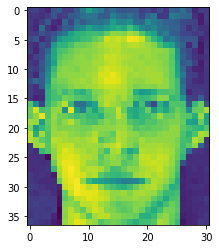

In [23]:
# def scale(img, mult):
# #     res = resize(img, (w_count, h_count)).flatten().astype(int)
    
#     res = rescale(img, 1 / mult, anti_aliasing=False).flatten() * 200
        
#     return res.astype(int)
# def scale2(img, mult):
#     res = rescale(img, 1 / mult, anti_aliasing=False) * 200
#     return res.astype(int)

plt.imshow(imgs[0][0])
a = scale(imgs[0][0], 3)
a = a.reshape((37,31))
plt.imshow(a)
# print(type(a))
print(a.shape)
#print(len(a[0]))
 #print(a)


In [24]:
# plt.imshow(a)

In [25]:

# plt.imshow(np.transpose(np.reshape(imgs_scaled[0][0], (-1,4))))

400
[66 67 66 ... 60 57 57]
1147


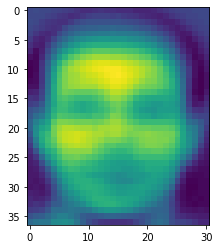

In [34]:
import copy
imgs_pca = copy.deepcopy(imgs_scaled)

mid = np.zeros(len(imgs_pca[0][0]))
c = 0
for i in imgs_pca:
    for j in i:
        mid += j
        c += 1
        
total = 400
print(c)
mid /= total
mid = mid.astype(int)
plt.imshow(mid.reshape((37,31)))
address = "res/mid_pca.jpg"
mpimg.imsave(address, mid.reshape((37,31)))
print(mid)
print(len(mid))

# print(imgs_pca[0][0])

for i in range(class_count):
    for j in range(image_count):
        imgs_pca[i][j] = imgs_pca[i][j] - mid
        


In [35]:
#m_imgs = np.zeros((99,400))
m_imgs = np.zeros((400, len(mid)))

count = 0
for i in range(class_count):
    for j in range(image_count):
        m_imgs[count] = imgs_pca[i][j]
        count += 1
# m_imgs = m_imgs.transpose()
len(m_imgs[1])

print(len(m_imgs))

400


In [36]:
cov = np.cov(m_imgs)

In [37]:
np.dot([1, 2, 4], [2, 3, 5])
a = np.array([[1,2,3,4],[5,6,7,8]])
print(a[:,2])

[3 7]


400 1147
400 1147
(37, 31)


<ipython-input-44-6d8a9706d5ae>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  pic += (vectors.T[i] * P[0][i]).astype(float)


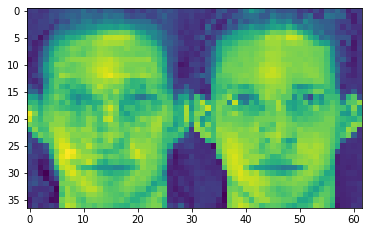

In [44]:
# calculate covariance matrix of centered matrix
print(len(m_imgs), len(m_imgs[0]))
V = np.cov(m_imgs.transpose())
# print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
# print(vectors)
# print(values)
# project data
P = vectors.T.dot(m_imgs.T).T
print(len(P), len(P[0]))

count = 100
pic = np.zeros(len(vectors))
for i in range(count):
    pic += (vectors.T[i] * P[0][i]).astype(float)

pic += mid
pic = pic.reshape((37,31))
print(pic.shape)
orig = (imgs_pca[0][0]+mid).reshape((37,31)).astype(int)
plt.imshow(np.concatenate((pic, orig), axis = 1))
# plt.imshow(pic)
# print(P.T)

<ipython-input-66-ec1727c22a03>:20: ComplexWarning: Casting complex values to real discards the imaginary part
  pic += (vectors.T[i] * P[image_num*image_count][i]).astype(float)
<ipython-input-66-ec1727c22a03>:43: ComplexWarning: Casting complex values to real discards the imaginary part
  pic += (vectors.T[i] * P[image_num*image_count][i]).astype(float)


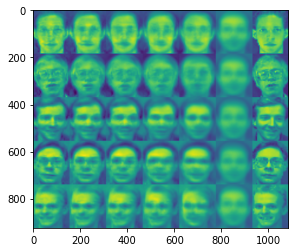

In [66]:
# calculate covariance matrix of centered matrix
rows = []
images_num = [0, 1, 2, 3, 4]
# print(len(m_imgs), len(m_imgs[0]))

V = np.cov(m_imgs.transpose())
values, vectors = eig(V)
P = vectors.T.dot(m_imgs.T).T
# print(len(P), len(P[0]))

size = (37, 31)
big_size = (37*5, 31*5)
    
for image_num in images_num:
    res = (imgs_pca[image_num][0]+mid).reshape((37,31)).astype(float)
    res = resize(res, big_size)
    for count in [1, 10, 20, 30, 40, 100]:  
        pic = np.zeros(len(vectors))
        for i in range(count):
            pic += (vectors.T[i] * P[image_num*image_count][i]).astype(float)
        
        pic += mid
        pic = pic.reshape((37,31))
        pic = resize(pic, big_size)
        res = np.concatenate((pic, res), axis = 1)

    rows.append(res)
    
full_img = np.concatenate(rows, axis = 0)

address = "res/pca_imgs_restore_mid.jpg"
mpimg.imsave(address, full_img)
plt.imshow(full_img)

rows = []

for image_num in images_num:
    res = (imgs_pca[image_num][0]).reshape((37,31)).astype(float)
    res = resize(res, big_size)
    for count in [1, 10, 20, 30, 40, 100]:  
        pic = np.zeros(len(vectors))
        for i in range(count):
            pic += (vectors.T[i] * P[image_num*image_count][i]).astype(float)
        
        pic = pic.reshape((37,31))
        pic = resize(pic, big_size)
        res = np.concatenate((pic, res), axis = 1)

    rows.append(res)
    

    
full_img_nomid = np.concatenate(rows, axis = 0)
# plt.imshow(full_img_nomid)


address = "res/pca_imgs_restore_nomid.jpg"
mpimg.imsave(address, full_img_nomid)
# plt.imshow(np.concatenate(rows), axis = 0)
# pic += mid
# pic = pic.reshape((37,31))
# print(pic.shape)
# orig = (imgs_pca[0][0]+mid).reshape((37,31)).astype(int)
# plt.imshow(np.concatenate((pic, orig), axis = 1))
# plt.imshow(pic)
# print(P.T)

In [33]:
cov_mat = np.cov(m_imgs.transpose())
values, vectors = eig(cov_mat)
res = vectors.T.dot(m_imgs.T).T
    
for size in range(5, 50, 5):
    #print(vecs, vecs2)
    #print(len(vecs2[0]))
    count = i*10 + 5
    print(size)

    imgs_pca = []
    
    count = 0
    for i in range(class_count):
        imgs_pca.append([])
    #     print(count)
        for j in range(image_count):
            #m_imgs[count] = imgs_pca[i][j]
            #imgs_pca[i][j] = res[count]
            
            imgs_pca[i].append(res[count][:size])
            count += 1
            
    count_to_load = 5
    test, train = test_train(imgs_pca, count_to_load)
    (fr(test, train))
    #Xnew = dot(v,Xcentered)
    #print Xnew

5
0.6799999999999999
10
0.8300000000000001
15
0.8550000000000001
20
0.86
25
0.8949999999999999
30
0.8949999999999999
35
0.89
40
0.89
45
0.89


In [34]:
main_values = 30
imgs_pca = []
count = 0
for i in range(class_count):
    imgs_pca.append([])
    for j in range(image_count):
        imgs_pca[i].append(res[count][:30])
        count += 1

In [35]:
test_count = 10
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_pca, count_to_load)
    result[i-1][0] = (fr(test, train))

0.7083333333333333
0.825
0.85
0.8875
0.8949999999999999
0.95
0.95
0.9375
0.925


In [36]:
vecs, vecs2 = np.linalg.eig(cov)
#print(vecs, vecs2)
print(len(vecs2[0]))
count = 20
res = np.dot(vecs2[0:count], m_imgs)
len(res[0])
res = res.transpose()
imgs_pca = []


V = np.cov(m_imgs.transpose())
# print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
# print(vectors)
# print(values)
# project data
P = vectors.T.dot(m_imgs.T).T
count = 0
for i in range(class_count):
    imgs_pca.append([])
#     print(count)
    for j in range(image_count):
        #m_imgs[count] = imgs_pca[i][j]
        #imgs_pca[i][j] = res[count]
        
        imgs_pca[i].append(res[count])
        count += 1
#Xnew = dot(v,Xcentered)
#print Xnew


400


In [37]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_pca, count_to_load)
    result[i-1][1] = (fr(test, train))

0.18333333333333332
0.15625
0.16785714285714287
0.17916666666666667
0.16499999999999998
0.225
0.19166666666666668
0.2
0.3


In [38]:
print(len(vecs2[0]))

400


In [39]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_random, count_to_load)
    result[i-1][1] = (fr(test, train))

0.058333333333333334
0.084375
0.08214285714285714
0.075
0.06
0.05625
0.05
0.0625
0.075


In [40]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_fft, count_to_load)
    result[i-1][2] = (fr(test, train))

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_hist, count_to_load)
    result[i-1][3] = (fr(test, train))

In [ ]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_grad, count_to_load)
    result[i-1][4] = (fr(test, train))

In [ ]:
for i in range(1,test_count):
    count_to_load = i
    test, train = test_train(imgs_cos, count_to_load)
    result[i-1][5] = (fr(test, train))

In [ ]:
graph_data = [[]]
picture_data = [[],[],[],[],[],[],[]]

In [ ]:
# res = result[0][0]
for c in range(1,test_count):
    res = result[c-1]
# print(res)
    voted = vote(res, class_count)
    right = []
    count_to_load = c
    for i in range(40):
        for j in range(10-count_to_load):
            right.append(i)
#     print(right)
    ans = 0
    t = voted
    res = 0
    for i in range(len(t)):
        if (t[i] == right[i]):
            ans += 1
    print(ans/len(t))
    graph_data[0].append(ans/len(t))
    if (c == 6):
        picture_data[0]=voted
#         print(1)
#     print(len(t))

In [ ]:
# graph_data = []

In [ ]:

for method_num in range(6):
    graph_data.append([])    
    for c in range(1,test_count):
        res = [result[c-1][method_num]]
# print(res)
        voted = vote(res, class_count)
        right = []
        count_to_load = c
        for i in range(40):
            for j in range(10-count_to_load):
                right.append(i)
#     print(right)
        ans = 0
        t = voted
        res = 0
        for i in range(len(t)):
            if (t[i] == right[i]):
                ans += 1
        print(method_num, c, ans/len(t))
        graph_data[method_num+1].append(ans/len(t))
        
        if (c == 6):
            picture_data[method_num+1]=voted

In [ ]:
graph_data


In [ ]:
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
rcParams['figure.dpi'] = 200

In [ ]:
x = [1,2,3,4,5,6,7,8,9]
plt.title('Dependencies from count of etalons')   # заголовок
plt.xlabel('etalon count')   # подпись оси OX
plt.ylabel('accuracy')   # подпись оси OY
plt.plot(x,graph_data[0], label = "parallel", linewidth=10.0)
plt.plot(x,graph_data[1], label = "scale", linewidth=5.0)
plt.plot(x,graph_data[2], label = "random", linewidth=5.0)
plt.plot(x,graph_data[3], label = "fft", linewidth=5.0)
plt.plot(x,graph_data[4], label = "hist", linewidth=5.0)
plt.plot(x,graph_data[5], label = "grad", linewidth=5.0)
plt.plot(x,graph_data[6], label = "dct", linewidth=5.0)

plt.legend()   # легенда

In [339]:
picture_data = [[],[],[],[],[],[]]
for i in range(0,40):
    for j in range(6,10):
        picture_data[5].append([i,j])
count_to_load = 6

In [340]:
test, train = test_train(imgs_scaled, count_to_load)
picture_data[0] = (fr_pic(test, train))

test, train = test_train(imgs_random, count_to_load)
picture_data[1] = (fr_pic(test, train))
    
test, train = test_train(imgs_fft, count_to_load)
picture_data[2] = (fr_pic(test, train))
    
test, train = test_train(imgs_hist, count_to_load)
picture_data[3] = (fr_pic(test, train))
    
test, train = test_train(imgs_grad, count_to_load)
picture_data[4] = (fr_pic(test, train))
    

/home/kapi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [337]:
num = 0
print(picture_data[5][3])

[0, 9]


0 41
1 41
2 41
3 41
4 41
5 41


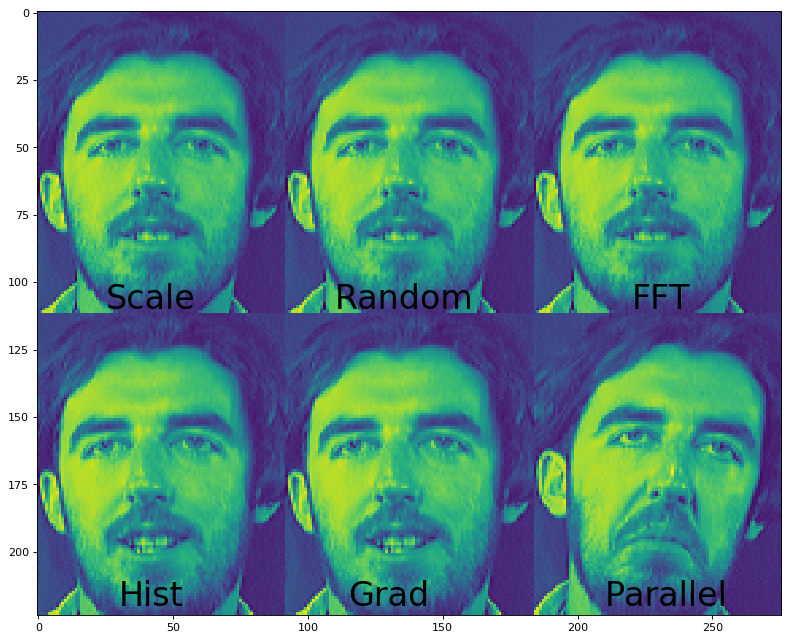

In [380]:

rcParams['figure.figsize'] = 20, 10
rcParams['figure.dpi'] = 80
num += 1

def get(a, b):
    print(a,b)
    return imgs[picture_data[a][b][0]][picture_data[a][b][1]]

hor1 = np.concatenate((get(0,num), get(1,num), get(2,num)), axis=1)
hor2 = np.concatenate((get(3,num), get(4,num), get(5,num)), axis=1)
text(25, 110, "Scale", fontsize=30)
text(110, 110, "Random", fontsize=30)
text(220, 110, "FFT", fontsize=30)
text(30, 220, "Hist", fontsize=30)
text(115, 220, "Grad", fontsize=30)
text(210, 220, "Parallel", fontsize=30)
final = np.concatenate((hor1, hor2), axis=0)
plt.imshow(final)

address = "res/num"+str(num)+".jpg"
mpimg.imsave(address, final)
# b = np.concatenate((b, b), axis=1)
# b = np.concatenate((b, b), axis=1)